# Corey Austen - Homework 2 - Notebook 1

### Import standard packages for Machine Learning

In [1]:
#Add packages
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

### Hide Warnings

In [72]:
#Hiding warnings in order to save space
import warnings
warnings.filterwarnings('ignore')

## Read in the Adult dataset.


In [31]:
#Read in the Adult dataset.
#Information on the dataset found here: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                 header=None, sep=',')
df_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', 
                 header=None, skiprows=1, sep=',')

### Descriptions of Features

###### income: (target variable) string of income above or below 50K

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: string of country name

In [32]:
#Set the column names
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df_test.columns = df.columns

In [33]:
#Set the target variable as income (a yes/no variable). 
# designate target variable name
targetName = 'income'
targetSeries = df[targetName]
#remove target from current location and insert in collum 0
del df[targetName]
df.insert(0, targetName, targetSeries)

targetSeries = df_test[targetName]
#remove target from current location and insert in column 0
del df_test[targetName]
df_test.insert(0, targetName, targetSeries)

In [34]:
#Education and Relationship are referenced twice in the dataset.  I will remove these features to prevent the influence of correlation.
del df['education']
del df_test['education']
del df['relationship']
del df_test['relationship']

# EDA

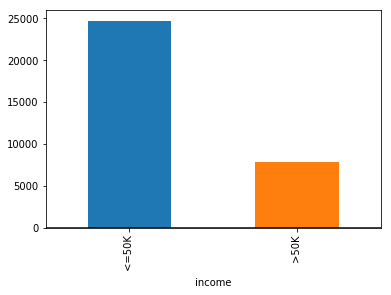

In [35]:
#Graph showing target distribution
groupby = df.groupby(targetName)
targetEDA=groupby[targetName].aggregate(len)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

In [36]:
#This Shows how the target is distributed in the data as a percentage of the total
print("Target Distribution as Percent of Total Target:", df.groupby(targetName).size() * 100 / len(df))

Target Distribution as Percent of Total Target: income
 <=50K    75.919044
 >50K     24.080956
dtype: float64


In [37]:
#Show information on the dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [38]:
#Take a look at the top 10 rows
df.head(10)

,income,age,workclass,fnlwgt,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,<=50K,39,State-gov,77516,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States
1,<=50K,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States
2,<=50K,38,Private,215646,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States
3,<=50K,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States
4,<=50K,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba
5,<=50K,37,Private,284582,14,Married-civ-spouse,Exec-managerial,White,Female,0,0,40,United-States
6,<=50K,49,Private,160187,5,Married-spouse-absent,Other-service,Black,Female,0,0,16,Jamaica
7,>50K,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,White,Male,0,0,45,United-States
8,>50K,31,Private,45781,14,Never-married,Prof-specialty,White,Female,14084,0,50,United-States
9,>50K,42,Private,159449,13,Married-civ-spouse,Exec-managerial,White,Male,5178,0,40,United-States


In [39]:
#Look at the data types of each feature
df.dtypes

income            object
age                int64
workclass         object
fnlwgt             int64
education-num      int64
marital-status    object
occupation        object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

### Transform the data so factors are dummied and missing values (if any) are fixed.

In [40]:
# This code turns a text target into numeric to some scikit learn alogrythms can process it
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
df['income'] = le_dep.fit_transform(df['income'])
df_test['income'] = le_dep.fit_transform(df_test['income'])

In [41]:
# perform data transformation. Creates dummies of any categorical feature
for col in df.columns[1:]:
	attName = col
	dType = df[col].dtype
	missing = pd.isnull(df[col]).any()
	uniqueCount = len(df[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
		del df[attName]
        
for col in df_test.columns[1:]:
	attName = col
	dType = df_test[col].dtype
	missing = pd.isnull(df_test[col]).any()
	uniqueCount = len(df_test[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df_test = pd.concat([df_test, pd.get_dummies(df_test[col], prefix=col)], axis=1)
		del df_test[attName]

In [42]:
#  'native-country_ Holand-Netherlands' is only found in Train set, so I'll add it in with all 0 values to the "test" set.
df_test['native-country_ Holand-Netherlands']=0

### Seperating the target from the features.

In [85]:
features_train= df.iloc[:,1:].values
target_train= df.iloc[:,0].values
features_test= df_test.iloc[:,1:].values
target_test= df_test.iloc[:,0].values

### Normalizing the feature spaces.

In [44]:
# Normalization - Standard Scaler
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Fit on training data
scaler.fit(features_train)  
X_train = scaler.transform(features_train)  
# apply same transformation to test data
scaler.fit(features_test)
X_test = scaler.transform(features_test)  

C:\Users\Corey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [45]:
#This will be used to quickly show the variance during cross validation by showing the range of scores.
def cvrange(scores):
    return max(scores) - min(scores)

# Models

## Decision Tree - v1

In [46]:
#Decision Tree v1.
start_time = time.clock()
from sklearn import tree 
model_dt1 = tree.DecisionTreeClassifier()
print(model_dt1)
print('-'*75)
model_dt1 = model_dt1.fit(features_train, target_train)
target_predicted_dt1 = model_dt1.predict(features_test)
print("DT v1 Accuracy Score:", accuracy_score(target_test, target_predicted_dt1))
print('-'*75)
print(classification_report(target_test, target_predicted_dt1,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_dt1))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
---------------------------------------------------------------------------
DT v1 Accuracy Score: 0.8019163442049014
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.87      0.86      0.87     12435
>$50K = yes       0.58      0.60      0.59      3846

avg / total       0.80      0.80      0.80     16281

[[10751  1684]
 [ 1541  2305]]
---------------------------------------------------------------------------
Time to run: 0.3100355185979424 seconds


### Cross validation - Decision Tree v1

In [18]:
#Cross Validation - Decision Tree v1
start_time = time.clock()
scores = cross_val_score(model_dt1, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_dt1= cvrange(scores)
print("Range of CV Scores:", range_dt1)

Time to run: 3.2253597726491154 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.80841265 0.81633907 0.81726044 0.80927518 0.8215602  0.81971744
 0.82616708 0.82309582 0.83660934 0.80835381]
---------------------------------------------------------------------------
CV Score Mean: 0.8186791028055996
Range of CV Scores: 0.02825552825552824


## Decision Tree - v2

In [47]:
#Decision Tree v2
start_time = time.clock()
model_dt2 = tree.DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=2,)
print(model_dt2)
print('-'*75)
model_dt2 = model_dt2.fit(features_train, target_train)
target_predicted_dt2 = model_dt2.predict(features_test)
print("DT v2 Accuracy Score:", accuracy_score(target_test, target_predicted_dt2))
print('-'*75)
print(classification_report(target_test, target_predicted_dt2,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_dt2))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
---------------------------------------------------------------------------
DT v2 Accuracy Score: 0.8227381610466188
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.87      0.90      0.89     12435
>$50K = yes       0.64      0.56      0.60      3846

avg / total       0.82      0.82      0.82     16281

[[11249  1186]
 [ 1700  2146]]
---------------------------------------------------------------------------
Time to run: 0.2951565056890786 seconds


### Cross validation - Decision Tree v2

In [22]:
#Cross Validation - DT v3
start_time = time.clock()
scores = cross_val_score(model_dt2, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_dt2= cvrange(scores)
print("Range of CV Scores:", range_dt2)

Time to run: 3.6083746749864822 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.82161498 0.81173219 0.82708845 0.81941032 0.83353808 0.82831695
 0.82862408 0.83261671 0.83875921 0.82002457]
---------------------------------------------------------------------------
CV Score Mean: 0.8261725548223859
Range of CV Scores: 0.027027027027027084


## Decision Tree - v3

In [48]:
#Decision Tree v3
start_time = time.clock()
model_dt3 = tree.DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=3,)
print(model_dt3)
print('-'*75)
model_dt3 = model_dt3.fit(features_train, target_train)
target_predicted_dt3 = model_dt3.predict(features_test)
print("DT v3 Accuracy Score:", accuracy_score(target_test, target_predicted_dt3))
print('-'*75)
print(classification_report(target_test, target_predicted_dt3,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_dt3))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
---------------------------------------------------------------------------
DT v3 Accuracy Score: 0.8221853694490511
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.87      0.91      0.89     12435
>$50K = yes       0.65      0.55      0.59      3846

avg / total       0.81      0.82      0.82     16281

[[11273  1162]
 [ 1733  2113]]
---------------------------------------------------------------------------
Time to run: 0.30044148647334623 seconds


### Cross validation - Decision Tree v3

In [24]:
#Cross Validation - Decision Tree v3
start_time = time.clock()
scores = cross_val_score(model_dt3, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_dt3= cvrange(scores)
print("Range of CV Scores:", range_dt3)

Time to run: 3.570642244632033 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.82345717 0.81726044 0.82678133 0.81879607 0.83046683 0.8252457
 0.83169533 0.83200246 0.83660934 0.81603194]
---------------------------------------------------------------------------
CV Score Mean: 0.8258346604063522
Range of CV Scores: 0.020577395577395574


## KNN - v1

In [76]:
#KNN v1
from sklearn.neighbors import KNeighborsClassifier
start_time = time.clock()
model_knn1 = KNeighborsClassifier(n_neighbors=3)
print(model_knn1)
print('-'*75)
model_knn1 = model_knn1.fit(X_train, target_train)
target_predicted_knn1 = model_knn1.predict(X_test)
print("KNN v1 Accuracy Score:", accuracy_score(target_test, target_predicted_knn1))
print('-'*75)
print(classification_report(target_test, target_predicted_knn1,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_knn1))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
---------------------------------------------------------------------------
KNN v1 Accuracy Score: 0.8124808058473066
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.87      0.89      0.88     12435
>$50K = yes       0.61      0.56      0.58      3846

avg / total       0.81      0.81      0.81     16281

[[11084  1351]
 [ 1702  2144]]
---------------------------------------------------------------------------
Time to run: 100.81164163506719 seconds


### Cross Validation - KNN v1

In [100]:
#Cross Validation - KNN v1
start_time = time.clock()
scores = cross_val_score(model_knn1, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_knn1= cvrange(scores)
print("Range of CV Scores:", range_knn1)

Time to run: 6.367643487188616 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.76096491 0.77719298 0.75833333 0.76261518 0.75076788 0.76042124
 0.75998245 0.75910487 0.75164546 0.76953468]
---------------------------------------------------------------------------
CV Score Mean: 0.7610562985279277
Range of CV Scores: 0.026425101806732743


## KNN - v2

In [84]:
#KNN v2
start_time = time.clock()
model_knn2 = KNeighborsClassifier(n_neighbors=6)
print(model_knn2)
print('-'*75)
model_knn2 = model_knn2.fit(X_train, target_train)
target_predicted_knn2 = model_knn2.predict(X_test)
print("KNN v2 Accuracy Score:", accuracy_score(target_test, target_predicted_knn2))
print('-'*75)
print(classification_report(target_test, target_predicted_knn2,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_knn2))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')
---------------------------------------------------------------------------
KNN v2 Accuracy Score: 0.8277132854247282
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.85      0.94      0.89     12435
>$50K = yes       0.70      0.48      0.57      3846

avg / total       0.82      0.83      0.82     16281

[[11646   789]
 [ 2016  1830]]
---------------------------------------------------------------------------
Time to run: 106.594943769569 seconds


### Cross Validation - KNN v2

In [26]:
#Cross Validation - KNN v2
start_time = time.clock()
scores = cross_val_score(model_knn2, X_train, target_train, cv=5)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_knn2= cvrange(scores)
print("Range of CV Scores:", range_knn2)

Time to run: 129.01887344167244 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.82007983 0.81941032 0.82555283 0.81142506 0.82800983 0.82063882
 0.83353808 0.82954545 0.82309582 0.82063882]
---------------------------------------------------------------------------
CV Score Mean: 0.8231934864917673
Range of CV Scores: 0.02211302211302213


## KNN - v3

In [33]:
#KNN v3
start_time = time.clock()
model_knn3 = KNeighborsClassifier(n_neighbors=18)
print(model_knn3)
print('-'*75)
model_knn3 = model_knn3.fit(X_train, target_train)
target_predicted_knn3 = model_knn3.predict(X_test)
print("KNN v3 Accuracy Score:", accuracy_score(target_test, target_predicted_knn3))
print('-'*75)
print(classification_report(target_test, target_predicted_knn3,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_knn3))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')
---------------------------------------------------------------------------
KNN v3 Accuracy Score: 0.8335483078434985
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.86      0.93      0.89     12435
>$50K = yes       0.69      0.53      0.60      3846

avg / total       0.82      0.83      0.83     16281

[[11532   903]
 [ 1807  2039]]
---------------------------------------------------------------------------
Time to run: 130.81041254992397 seconds


### Cross Validation - KNN v3

In [34]:
#Cross Validation KNN v3
start_time = time.clock()
scores = cross_val_score(model_knn3, X_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_knn3= cvrange(scores)
print("Range of CV Scores:", range_knn3)

Time to run: 129.00266126373663 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.82499232 0.82985258 0.84060197 0.82340295 0.83323096 0.82125307
 0.83507371 0.83906634 0.83722359 0.82708845]
---------------------------------------------------------------------------
CV Score Mean: 0.8311785936018359
Range of CV Scores: 0.01934889434889442


### Grid Search - KNN

In [78]:
#Grid Search - KNN
start_time = time.clock()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#parameters = {'n_neighbors':[2,3,4,5,6]}
#parameters = {'n_neighbors':[6,7,8,9,10]}
parameters = {'n_neighbors':[17,18,19]}
knng = KNeighborsClassifier()
grid_svm = GridSearchCV(knng, parameters,n_jobs=-1, cv=5)
grid_svm.fit(X_train, target_train)
print("SCORES:", grid_svm.cv_results_)
print('-'*75)
print("BEST SCORE:", grid_svm.best_score_)
print("BEST PARAM:", grid_svm.best_params_)
print("Time to run:", time.clock() - start_time, "seconds")

SCORES: {'mean_fit_time': array([1.71066833, 2.23955746, 2.43126726, 2.37391529, 2.18210406]), 'std_fit_time': array([0.28106134, 0.09862793, 0.31558668, 0.17238789, 0.04236267]), 'mean_score_time': array([31.44100266, 32.00824566, 32.22943444, 32.5562036 , 29.56440616]), 'std_score_time': array([0.16138528, 0.23057656, 0.10721664, 0.29893504, 6.01689231]), 'param_n_neighbors': masked_array(data=[2, 3, 4, 5, 6],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}], 'split0_test_score': array([0.80822969, 0.81636727, 0.82066636, 0.81774912, 0.82235529]), 'split1_test_score': array([0.80789312, 0.81111794, 0.81603194, 0.81818182, 0.82063882]), 'split2_test_score': array([0.81603194, 0.81894963, 0.82417076, 0.82662776, 0.82463145]), 'split3_test_score': array([0.81188575, 0.82125307, 0.82862408, 0.83338452, 0.83277027]), 'split4

## Naïve Bayes

In [49]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
start_time = time.clock()
model_nb = MultinomialNB()
print(model_nb)
print('-'*75)
model_nb = model_nb.fit(features_train, target_train)
target_predicted_nb = model_nb.predict(features_test)
print("Naive Bayes Accuracy Score:", accuracy_score(target_test, target_predicted_nb))
print('-'*75)
print(classification_report(target_test, target_predicted_nb,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_nb))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
---------------------------------------------------------------------------
Naive Bayes Accuracy Score: 0.785148332412014
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.80      0.96      0.87     12435
>$50K = yes       0.62      0.23      0.34      3846

avg / total       0.76      0.79      0.75     16281

[[11894   541]
 [ 2957   889]]
---------------------------------------------------------------------------
Time to run: 0.03766245698136572 seconds


### Cross validation - NB

In [30]:
#Cross Validation - NB
start_time = time.clock()
scores = cross_val_score(model_nb, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_nb= cvrange(scores)
print("Range of CV Scores:", range_nb)

Time to run: 0.7485615656719347 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.78231501 0.78194103 0.77886978 0.77979115 0.78101966 0.79084767
 0.77364865 0.78163391 0.78409091 0.79238329]
---------------------------------------------------------------------------
CV Score Mean: 0.7826541058042441
Range of CV Scores: 0.01873464373464373


## Stochastic Gradient Descent

In [35]:
#Stochastic Gradient Descent v1
from sklearn.linear_model import SGDClassifier
model_sgd1 = SGDClassifier(loss="hinge", penalty="l2")
print(model_sgd1)
print('-'*75)
#fit the data
model_sgd1 = model_sgd1.fit(features_train, target_train)
#make the prediction on the unseen data
target_predicted_sgd1 = model_sgd1.predict(features_test)
print("Stochastic Gradient Descent v1 Accuracy Score:", accuracy_score(target_test, target_predicted_sgd1))
print('-'*75)
print(classification_report(target_test, target_predicted_sgd1,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_sgd1))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
---------------------------------------------------------------------------
Stochastic Gradient Descent v1 Accuracy Score: 0.7945457895706652
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.80      0.98      0.88     12435
>$50K = yes       0.73      0.21      0.32      3846

avg / total       0.78      0.79      0.75     16281

[[12145   290]
 [ 3055   791]]
---------------------------------------------------------------------------
Time to run: 129.12622826736606 seconds


C:\Users\Corey\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## Random Forest - v1

In [50]:
#Random Forest v1
from sklearn.ensemble import RandomForestClassifier
#create the classifier and tune the parameters
start_time = time.clock()
model_rf1 = RandomForestClassifier(n_estimators= 125, max_depth= None,random_state=0 )
print(model_rf1)
print('-'*75)
#fit the data
model_rf1 = model_rf1.fit(features_train, target_train)
#make the prediction on the unseen data
target_predicted_rf1 = model_rf1.predict(features_test)
print("Random Forest v1 Accuracy Score:", accuracy_score(target_test, target_predicted_rf1))
print('-'*75)
print(classification_report(target_test, target_predicted_rf1,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_rf1))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=125, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
---------------------------------------------------------------------------
Random Forest v1 Accuracy Score: 0.860573674835698
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.88      0.95      0.91     12435
>$50K = yes       0.78      0.57      0.66      3846

avg / total       0.85      0.86      0.85     16281

[[11808   627]
 [ 1643  2203]]
---------------------------------------------------------------------------
Time to run: 4.428620190503921 seconds


### Cross validation - Random Forest v1

In [45]:
#Cross Validation - Random Forest v1
start_time = time.clock()
scores = cross_val_score(model_rf1, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_rf1= cvrange(scores)
print("Range of CV Scores:", range_rf1)

Time to run: 37.873624674773055 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.84310715 0.86056511 0.85350123 0.84735872 0.85780098 0.84766585
 0.85995086 0.86025799 0.86332924 0.85565111]
---------------------------------------------------------------------------
CV Score Mean: 0.8549188234903617
Range of CV Scores: 0.020222084506702265


## Random Forest - v2

In [51]:
#Random Forest v2
start_time = time.clock()
model_rf2 = RandomForestClassifier(n_estimators= 115, max_depth= None,random_state=0 )
print(model_rf2)
print('-'*75)
#fit the data
model_rf = model_rf2.fit(features_train, target_train)
#make the prediction on the unseen data
target_predicted_rf2 = model_rf2.predict(features_test)
print("Random Forest v2 Accuracy Score:", accuracy_score(target_test, target_predicted_rf2))
print('-'*75)
print(classification_report(target_test, target_predicted_rf2, target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_rf2))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
---------------------------------------------------------------------------
Random Forest v2 Accuracy Score: 0.8599594619495117
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.88      0.95      0.91     12435
>$50K = yes       0.78      0.57      0.66      3846

avg / total       0.85      0.86      0.85     16281

[[11799   636]
 [ 1644  2202]]
---------------------------------------------------------------------------
Time to run: 4.108159208197208 seconds


### Cross validation - Random Forest v2

In [46]:
#Cross Validation - Random Forest v2
start_time = time.clock()
scores = cross_val_score(model_rf2, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_rf2= cvrange(scores)
print("Range of CV Scores:", range_rf2)

Time to run: 34.78274263195999 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.84280012 0.86087224 0.85135135 0.84858722 0.85718673 0.84766585
 0.85964373 0.85964373 0.86425061 0.85749386]
---------------------------------------------------------------------------
CV Score Mean: 0.8549495454507735
Range of CV Scores: 0.021450491438210206


## Random Forest - v3

In [63]:
#Random Forest v3
from sklearn.ensemble import RandomForestClassifier
start_time = time.clock()
model_rf3 = RandomForestClassifier(n_estimators= 300, max_depth= None,random_state=0 )
print(model_rf3)
print('-'*75)
#fit the data
model_rf3 = model_rf3.fit(features_train, target_train)
#make the prediction on the unseen data
target_predicted_rf3 = model_rf3.predict(features_test)
print("Random Forest v3 Accuracy Score:", accuracy_score(target_test, target_predicted_rf3))
print('-'*75)
print(classification_report(target_test, target_predicted_rf3, target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_rf3))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
---------------------------------------------------------------------------
Random Forest v3 Accuracy Score: 0.8616178367422148
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.88      0.95      0.91     12435
>$50K = yes       0.78      0.57      0.66      3846

avg / total       0.86      0.86      0.85     16281

[[11824   611]
 [ 1642  2204]]
---------------------------------------------------------------------------
Time to run: 10.725292501499553 seconds


### Cross validation - Random Forest v3

In [47]:
#Cross Validation - Random Forest v3
start_time = time.clock()
scores = cross_val_score(model_rf3, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print ('-'*75)
print("Cross Validation Score for each K:",scores)
print ('-'*75)
print("CV Score Mean:",scores.mean())
range_rf3= cvrange(scores)
print("Range of CV Scores:", range_rf3)

Time to run: 36.36556849241242 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.84095794 0.85995086 0.8531941  0.84889435 0.85810811 0.84797297
 0.85902948 0.86148649 0.86363636 0.85595823]
---------------------------------------------------------------------------
CV Score Mean: 0.8549188894982571
Range of CV Scores: 0.022678426884751746


### Grid Search - Random Forest

In [41]:
#Grid Search - Random Forest
start_time = time.clock()
#parameters = {'n_estimators':[20,30,40,50,60]}
#parameters = {'n_estimators':[55,60,70,80,90]}
parameters = {'n_estimators':[90,100,110,120,130]}
rfg = RandomForestClassifier(max_depth= None,random_state=0 )
grid_rfg = GridSearchCV(rfg, parameters,n_jobs=-1, cv=5)
grid_rfg = grid_rfg.fit(features_train, target_train)
print("SCORES:", grid_rfg.cv_results_)
print('-'*75)
print("BEST SCORE:", grid_rfg.best_score_)
print("BEST PARAM:", grid_rfg.best_params_)
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

SCORES: {'mean_fit_time': array([3.71947284, 5.84224119, 6.5432056 , 7.19905033, 5.88305054]), 'std_fit_time': array([0.43663316, 0.3023667 , 0.08568483, 0.0315701 , 0.90514597]), 'mean_score_time': array([0.17015157, 0.21737843, 0.24043965, 0.25267282, 0.17706957]), 'std_score_time': array([0.02101169, 0.01144816, 0.00826571, 0.00660525, 0.02091012]), 'param_n_estimators': masked_array(data=[90, 100, 110, 120, 130],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 90}, {'n_estimators': 100}, {'n_estimators': 110}, {'n_estimators': 120}, {'n_estimators': 130}], 'split0_test_score': array([0.85521265, 0.8538308 , 0.85490557, 0.85536619, 0.85490557]), 'split1_test_score': array([0.84566953, 0.84613022, 0.84566953, 0.84689803, 0.84628378]), 'split2_test_score': array([0.85288698, 0.85380835, 0.85288698, 0.85242629, 0.85273342]), 'split3_test_score': array([0.85872236, 0.85949017, 0.85902948, 0.85995086, 0.

## Bagging Classifier (Decision Tree)

In [41]:
#Bagging Classifier - Decision Tree
from sklearn.ensemble import BaggingClassifier
start_time = time.clock()
dt_bag = BaggingClassifier(base_estimator=model_dt3,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)
print(dt_bag)
print('-'*75)
dt_bag = dt_bag.fit(features_train, target_train)
target_predicted_dt_bag = dt_bag.predict(features_test)
print("Bagging - Decision Tree Accuracy Score:", accuracy_score(target_test, target_predicted_dt_bag))
print('-'*75)
print(classification_report(target_test, target_predicted_dt_bag, target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_dt_bag))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)
---------------------------------------------------------------------------
Bagging - Decision Tree Accuracy Score: 0.8586081935999017
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.88      0.95      0.91     12435
>$50K = yes       0.77      0.58      0.66      3846

avg / total       0.85      0.86      0.85     162

### Cross validation - Bagging DT

In [42]:
#Cross Validation - Bagging DT
start_time = time.clock()
scores = cross_val_score(dt_bag, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print ('-'*75)
print("Cross Validation Score for each K:",scores)
print ('-'*75)
print("CV Score Mean:",scores.mean())
range_dt_bag= cvrange(scores)
print("Range of CV Scores:", range_dt_bag)

Time to run: 1046.7742636226922 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.84771262 0.85902948 0.85872236 0.85595823 0.86486486 0.85749386
 0.85964373 0.86332924 0.86916462 0.85472973]
---------------------------------------------------------------------------
CV Score Mean: 0.8590648736910635
Range of CV Scores: 0.021452000190102738


## Bagging Classifier (Random Forest)
This would not run.

In [ ]:
#Bagging Classifier - Random Forest
from sklearn.ensemble import BaggingClassifier
start_time = time.clock()
rf_bag = BaggingClassifier(base_estimator=model_rf3,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)
print(rf_bag)
print('-'*75)
rf_bag = rf_bag.fit(features_train, target_train)
target_predicted_rf_bag = rf_bag.predict(features_test)
print("Bagging - Random Forest Accuracy Score:", accuracy_score(target_test, target_predicted_rf_bag))
print('-'*75)
print(classification_report(target_test, target_predicted_rf_bag, target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_rf_bag))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

### Cross validation - Bagging RF

In [ ]:
#Cross Validation - Bagging RF
start_time = time.clock()
scores = cross_val_score(rf_bag, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print ('-'*75)
print("Cross Validation Score for each K:",scores)
print ('-'*75)
print("CV Score Mean:",scores.mean())
range_rf_bag= cvrange(scores)
print("Range of CV Scores:", range_rf_bag)

## SVM Linear - v1

In [79]:
#standard linear SVC - v1
from sklearn.svm import SVC
start_time = time.clock()
svm_lin1 = SVC(kernel='linear', C=1,class_weight='balanced',gamma='auto',random_state=1)
print(svm_lin1)
print('-'*75)
svm_lin1 = svm_lin1.fit(X_train, target_train)
predicted_SVM1=svm_lin1.predict(X_test)
expected = target_test
# summarize the fit of the model
print("SVM Linear v1 Accuracy Score:", accuracy_score(expected,predicted_SVM1))
print('-'*75)
print(classification_report(expected, predicted_SVM1,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_SVM1))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)
---------------------------------------------------------------------------
SVM Linear v1 Accuracy Score: 0.7916589890055893
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.95      0.77      0.85     12435
>$50K = yes       0.54      0.86      0.66      3846

avg / total       0.85      0.79      0.80     16281

[[9600 2835]
 [ 557 3289]]
---------------------------------------------------------------------------
Time to run: 123.02303233310249 seconds


### Cross Validation - SVM Linear v1

In [53]:
#Cross Validation - SVM Linear v1
start_time = time.clock()
scores = cross_val_score(svm_lin1, X_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_svm1= cvrange(scores)
print("Range of CV Scores:", range_svm1)

Time to run: 1407.4328703618085 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.7930611  0.79054054 0.79330467 0.76934889 0.78839066 0.78777641
 0.79176904 0.79699017 0.80128993 0.78900491]
---------------------------------------------------------------------------
CV Score Mean: 0.7901476332586249
Range of CV Scores: 0.03194103194103193


## SVM Linear - v2

In [80]:
#SVC Linear - v2
start_time = time.clock()
svm_lin2 = SVC(kernel='linear', C=1,class_weight=None,gamma='auto', random_state=1, tol=0.0001)
print(svm_lin2)
print('-'*75)
svm_lin2=svm_lin2.fit(X_train, target_train)
predicted_SVM2=svm_lin2.predict(X_test)
expected = target_test
print("SVM Linear v2 Accuracy Score:", accuracy_score(expected,predicted_SVM2))
print('-'*75)
print(classification_report(expected, predicted_SVM2,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_SVM2))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.0001, verbose=False)
---------------------------------------------------------------------------
SVM Linear v2 Accuracy Score: 0.8538173330876482
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.88      0.93      0.91     12435
>$50K = yes       0.73      0.60      0.66      3846

avg / total       0.85      0.85      0.85     16281

[[11606   829]
 [ 1551  2295]]
---------------------------------------------------------------------------
Time to run: 93.9577764737569 seconds


### Cross Validation - SVM Linear v2
This was not run again as the model did not out perform the Adaboost DT

In [26]:
#Cross Validation - SVM Linear v2
start_time = time.clock()
scores = cross_val_score(svm_lin2, X_train, target_train, cv=5)
print("Time to run:", time.clock() - start_time, "seconds")
print ('-'*75)
print("Cross Validation Score for each K:",scores)
print ('-'*75)
print("CV Score Mean:",scores.mean())
range_svm2= cvrange(scores)
print("Range of CV Scores:", range_svm2)

Time to run: 2673.2445608579746 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.80438596 0.78464912 0.78157895 0.79201404 0.78060553 0.7779728
 0.78455463 0.78938131 0.7779728  0.79850746]
---------------------------------------------------------------------------
CV Score Mean: 0.7871622594746642
Range of CV Scores: 0.02641316982671682


## SVM Linear - v3

In [81]:
#standard linear SVC v3
start_time = time.clock()
svm_lin3 = SVC(kernel='linear', C=10,class_weight=None,gamma='auto',random_state=1)
print(svm_lin3)
print('-'*75)
svm_lin3=svm_lin3.fit(X_train, target_train)
predicted_SVM3=svm_lin3.predict(X_test)
expected = target_test
# summarize the fit of the model
print("SVM Linear v3 Accuracy Score:", accuracy_score(expected,predicted_SVM3))
print('-'*75)
print(classification_report(expected, predicted_SVM3,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_SVM3))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)
---------------------------------------------------------------------------
SVM Linear v3 Accuracy Score: 0.8540015969535041
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.88      0.93      0.91     12435
>$50K = yes       0.73      0.60      0.66      3846

avg / total       0.85      0.85      0.85     16281

[[11603   832]
 [ 1545  2301]]
---------------------------------------------------------------------------
Time to run: 326.9537660892538 seconds


### Cross Validation - SVM Linear v3
This was not run as the model did not out perform the Adaboost DT

In [ ]:
#Cross Validation - SVM Linear v3
start_time = time.clock()
scores = cross_val_score(svm_lin3, X_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_svm3= cvrange(scores)
print("Range of CV Scores:", range_svm3)

### Grid Search - SVM Linear

##### Be Careful, this takes a long time!

In [24]:
start_time = time.clock()
from sklearn.svm import SVC
parameters = {'C':[.01,.05,1,3,4,9,10]}
#parameters = {'C':[10,15,17,20,22,25,30]}
#parameters = {'C':[9.5,9.75,10,10.5,11,12,13]}
svr = SVC(kernel='linear')
grid_svm = GridSearchCV(svr, parameters,n_jobs=-1, cv=5)
grid_svm=grid_svm.fit(X_train, target_train)
print("SCORES:", grid_svm.cv_results_)
print('-'*75)
print("BEST SCORE:", grid_svm.best_score_)
print("BEST PARAM:", grid_svm.best_params_)
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

SCORES: {'mean_fit_time': array([ 49.05105042,  50.98174663,  71.51554031, 103.10222011,
       113.92359142, 187.59611568, 159.1884409 ]), 'std_fit_time': array([ 1.6996875 ,  0.21335724,  0.59074362,  1.66402773,  5.00363071,
        2.1288134 , 24.11585921]), 'mean_score_time': array([6.97233734, 6.81491861, 6.25162101, 5.49721565, 6.0708405 ,
       4.58107986, 3.76524177]), 'std_score_time': array([0.19423973, 0.38952793, 0.30953304, 0.72856188, 0.49018182,
       0.31534682, 1.08980301]), 'param_C': masked_array(data=[0.01, 0.05, 1, 3, 4, 9, 10],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.05}, {'C': 1}, {'C': 3}, {'C': 4}, {'C': 9}, {'C': 10}], 'split0_test_score': array([0.85172187, 0.85303795, 0.85413468, 0.85413468, 0.85391533,
       0.85391533, 0.85391533]), 'split1_test_score': array([0.85172187, 0.85237991, 0.85325729, 0.85347664, 0.85347664,
       0.85325729, 0.853

## Gradient Boost Classification - v1

In [23]:
start_time = time.clock()
from sklearn.ensemble import GradientBoostingClassifier
model_GBC1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.7, max_depth=1, random_state=0)
print(model_GBC1)
print('-'*75)
model_GBC1.fit(features_train, target_train)
predicted_GBC1=model_GBC1.predict(features_test)
expected = target_test
print("Gradient Boost v1 Accuracy:", accuracy_score(expected,predicted_GBC1))
print('-'*75)
print(classification_report(expected, predicted_GBC1,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_GBC1))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.7, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)
---------------------------------------------------------------------------
Gradient Boost v1 Accuracy: 0.8487193661323015
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.88      0.93      0.90     12435
>$50K = yes       0.72      0.58      0.65      3846

avg / total       0.84      0.85      0.84     16281

[[11577   858]
 [ 1605  2241]]
---------------------------------------------------------------------------
Time to run

### Cross Validation - Gradient Boost Classification v1

In [41]:
#Cross Validation - Gradient Boost v1
start_time = time.clock()
scores = cross_val_score(model_GBC1, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_GBC1= cvrange(scores)
print("Range of CV Scores:", range_GBC1)

Time to run: 37.20763032948889 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.84280012 0.83937346 0.85411548 0.84490172 0.85165848 0.85595823
 0.8495086  0.84613022 0.8507371  0.85227273]
---------------------------------------------------------------------------
CV Score Mean: 0.8487456142468425
Range of CV Scores: 0.016584766584766597


## Gradient Boost Classification - v2

In [24]:
#Gradient Boost v2
start_time = time.clock()
model_GBC2 = GradientBoostingClassifier(n_estimators=150, learning_rate=1.7, max_depth=2, random_state=0)
print(model_GBC2)
print('-'*75)
model_GBC2.fit(features_train, target_train)
predicted_GBC2=model_GBC2.predict(features_test)
expected = target_test
print("Gradient Boost v2 Accuracy:", accuracy_score(expected,predicted_GBC2))
print('-'*75)
print(classification_report(expected, predicted_GBC2,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_GBC2))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.7, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)
---------------------------------------------------------------------------
Gradient Boost v2 Accuracy: 0.717953442663227
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.93      0.68      0.79     12435
>$50K = yes       0.45      0.83      0.58      3846

avg / total       0.81      0.72      0.74     16281

[[8516 3919]
 [ 673 3173]]
---------------------------------------------------------------------------
Time to run: 6.2

### Cross Validation - Gradient Boost Classification v2

In [43]:
#Cross Validation - Gradient Boost v2
start_time = time.clock()
scores = cross_val_score(model_GBC2, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_GBC2= cvrange(scores)
print("Range of CV Scores:", range_GBC2)

Time to run: 119.44750297813061 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.85293215 0.7220516  0.83046683 0.76320639 0.70700246 0.8264742
 0.8277027  0.71990172 0.72389435 0.70915233]
---------------------------------------------------------------------------
CV Score Mean: 0.768278472599934
Range of CV Scores: 0.14592968914430382


## Gradient Boost Classification - v3

In [25]:
#Gradient Boost v3
start_time = time.clock()
model_GBC3 = GradientBoostingClassifier(n_estimators=300, learning_rate=1.3, max_depth=1, random_state=0)
print(model_GBC3)
print('-'*75)
model_GBC3.fit(features_train, target_train)
predicted_GBC3=model_GBC3.predict(features_test)
expected = target_test
print("Gradient Boost v3 Accuracy:", accuracy_score(expected,predicted_GBC3))
print('-'*75)
print(classification_report(expected, predicted_GBC3,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_GBC3))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.3, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)
---------------------------------------------------------------------------
Gradient Boost v3 Accuracy: 0.8571955039616731
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.88      0.94      0.91     12435
>$50K = yes       0.75      0.60      0.66      3846

avg / total       0.85      0.86      0.85     16281

[[11663   772]
 [ 1553  2293]]
---------------------------------------------------------------------------
Time to run

### Cross Validation - Gradient Boost Classification v3

In [45]:
#Cross Validation - Gradient Boost v3
start_time = time.clock()
scores = cross_val_score(model_GBC3, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_GBC3= cvrange(scores)
print("Range of CV Scores:", range_GBC3)

Time to run: 107.56195905823915 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.85477433 0.85687961 0.86609337 0.8482801  0.86117936 0.86148649
 0.86179361 0.86517199 0.86025799 0.86517199]
---------------------------------------------------------------------------
CV Score Mean: 0.860108882852205
Range of CV Scores: 0.017813267813267752


## SVM RBF - v1
Be careful on this one as it will be slow to train. Think of ways to work around this limitation

In [23]:
#standard SVC with rbf kernal v1
from sklearn.svm import SVC
start_time = time.clock()
svm_rbf1 = SVC(kernel='rbf', C=1.0, degree=3, class_weight='balanced',gamma=0.1)
print(svm_rbf1)
print('-'*75)
svm_rbf1.fit(X_train, target_train)
predicted_rbf1=svm_rbf1.predict(X_test)
expected = target_test
# summarize the fit of the model
print("SVM RBF v1 Accuracy Score:", accuracy_score(expected,predicted_rbf1))
print('-'*75)
print(classification_report(expected, predicted_rbf1,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_rbf1))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
---------------------------------------------------------------------------
SVM RBF v1 Accuracy Score: 0.7906148270990725
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.89      0.82      0.86     12435
>$50K = yes       0.55      0.69      0.61      3846

avg / total       0.81      0.79      0.80     16281

[[10232  2203]
 [ 1206  2640]]
---------------------------------------------------------------------------
Time to run: 405.96215208513513 seconds


### Cross Validation - SVM RBF v1
This was not run as the model did not out perform the Adaboost DT

In [ ]:
#Cross Validation - SVM rbf v1
start_time = time.clock()
scores = cross_val_score(svm_rbf1, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_rbf1= cvrange(scores)
print("Range of CV Scores:", range_rbf1)

## SVM RBF - v2

In [24]:
#standard SVC with rbf kernal v2
from sklearn.svm import SVC
start_time = time.clock()
svm_rbf2 = SVC(kernel='rbf', C=2, degree=3, class_weight='balanced',gamma=0.1)
print(svm_rbf2)
print('-'*75)
svm_rbf2.fit(features_train, target_train)
predicted_rbf2=svm_rbf2.predict(features_test)
expected = target_test
# summarize the fit of the model
print("SVM RBF v2 Accuracy Score:", accuracy_score(expected,predicted_rbf2))
print('-'*75)
print(classification_report(expected, predicted_rbf2,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_rbf2))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

SVC(C=2, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
---------------------------------------------------------------------------
SVM RBF v2 Accuracy Score: 0.763589460106873
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.77      0.99      0.87     12435
>$50K = yes       0.49      0.02      0.04      3846

avg / total       0.70      0.76      0.67     16281

[[12349    86]
 [ 3763    83]]
---------------------------------------------------------------------------
Time to run: 832.2826793430349 seconds


### Cross Validation - SVM RBF v2
This was not run as the model did not out perform the Adaboost DT

In [ ]:
#Cross Validation - SVM rbf v2
start_time = time.clock()
scores = cross_val_score(svm_rbf2, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_rbf2= cvrange(scores)
print("Range of CV Scores:", range_rbf2)

## SVM RBF - v3

In [25]:
#standard SVC with rbf kernal v3
from sklearn.svm import SVC
start_time = time.clock()
svm_rbf3 = SVC(kernel='rbf', C=3, degree=3, class_weight='balanced',gamma=0.1)
print(svm_rbf3)
print ('-'*75)
svm_rbf3.fit(features_train, target_train)
predicted_rbf3=svm_rbf3.predict(features_test)
expected = target_test
# summarize the fit of the model
print("SVM RBF v3 Accuracy Score:", accuracy_score(expected,predicted_rbf3))
print('-'*75)
print(classification_report(expected, predicted_rbf3,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_rbf3))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

SVC(C=3, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
---------------------------------------------------------------------------
SVM RBF v3 Accuracy Score: 0.763589460106873
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.77      0.99      0.87     12435
>$50K = yes       0.49      0.02      0.04      3846

avg / total       0.70      0.76      0.67     16281

[[12349    86]
 [ 3763    83]]
---------------------------------------------------------------------------
Time to run: 842.1165875863262 seconds


### Cross Validation - SVM RBF v3
This was not run as the model did not out perform the Adaboost DT

In [ ]:
#Cross Validation - SVM rbf v3
start_time = time.clock()
scores = cross_val_score(svm_rbf3, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_rbf3= cvrange(scores)
print("Range of CV Scores:", range_rbf3)

### Grid Search - SVM RBF

In [25]:
#Grid Search - SVM rbf
start_time = time.clock()
parameters = {'C':[1,2,3,4,5]}
rbfg = SVC(kernel='rbf', degree=3, class_weight='balanced',gamma=0.1)
grid_rbf = GridSearchCV(rbfg, parameters,n_jobs=-1, cv=5)
grid_rbf=grid_rbf.fit(features_train, target_train)
print("SCORES:", grid_rbf.cv_results_)
print('-'*75)
print("BEST SCORE:", grid_rbf.best_score_)
print("BEST PARAM:", grid_rbf.best_params_)
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

SCORES: {'mean_fit_time': array([569.6239852 , 522.99389968, 521.78387904, 536.65792646,
       496.86059675]), 'std_fit_time': array([ 4.6357716 , 11.72427549,  8.27815193,  9.33705185, 95.95986741]), 'mean_score_time': array([21.61837754, 21.19916277, 21.7483233 , 21.5221221 , 20.2492723 ]), 'std_score_time': array([0.10060629, 0.49361515, 0.19135163, 0.32669346, 3.46690753]), 'param_C': masked_array(data=[1, 2, 3, 4, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1}, {'C': 2}, {'C': 3}, {'C': 4}, {'C': 5}], 'split0_test_score': array([0.76244791, 0.76222856, 0.76244791, 0.76244791, 0.76244791]), 'split1_test_score': array([0.75784163, 0.75849967, 0.75849967, 0.75849967, 0.75849967]), 'split2_test_score': array([0.76069313, 0.76069313, 0.76069313, 0.76069313, 0.76069313]), 'split3_test_score': array([0.7580079 , 0.75822729, 0.75822729, 0.75822729, 0.75822729]), 'split4_test_score': array([0.75839368, 0.758

## Extra Trees - v1

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
start_time = time.clock()
xdt1 = ExtraTreesClassifier(max_depth=5, n_estimators=100,class_weight='balanced')
print(xdt1)
print('-'*75)
xdt1.fit(features_train, target_train)
predicted_xdt1=xdt1.predict(features_test)
expected = target_test
print("Extra Trees v1 Accuracy Score:", accuracy_score(expected,predicted_xdt1))
print('-'*75)
print(classification_report(expected, predicted_xdt1,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_xdt1))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
---------------------------------------------------------------------------
Extra Trees v1 Accuracy Score: 0.7281493765739205
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.94      0.69      0.79     12435
>$50K = yes       0.46      0.86      0.60      3846

avg / total       0.83      0.73      0.75     16281

[[8556 3879]
 [ 547 3299]]
---------------------------------------------------------------------------
Time to run: 0.9669219367377764 seconds


### Cross Validation - Extra Trees v1

In [45]:
#verify Random Forest with Cross Validation
start_time = time.clock()
scores = cross_val_score(xdt1, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_xdt1= cvrange(scores)
print("Range of CV Scores:", range_xdt1)

Time to run: 15.923048062890302 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.73349708 0.71375921 0.7269656  0.7220516  0.71928747 0.73126536
 0.72020885 0.72542998 0.7257371  0.71867322]
---------------------------------------------------------------------------
CV Score Mean: 0.7236875461583783
Range of CV Scores: 0.019737869446189937


## Extra Trees - v2

In [29]:
start_time = time.clock()
xdt2 = ExtraTreesClassifier(max_depth=4, n_estimators=150,class_weight='balanced')
print(xdt2)
print('-'*75)
xdt2.fit(features_train, target_train)
predicted_xdt2=xdt2.predict(features_test)
expected = target_test
print("Extra Trees v2 Accuracy Score:", accuracy_score(expected,predicted_xdt2))
print('-'*75)
print(classification_report(expected, predicted_xdt2,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_xdt2))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=4, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
---------------------------------------------------------------------------
Extra Trees v2 Accuracy Score: 0.7235427799275229
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.94      0.68      0.79     12435
>$50K = yes       0.45      0.85      0.59      3846

avg / total       0.82      0.72      0.74     16281

[[8493 3942]
 [ 559 3287]]
---------------------------------------------------------------------------
Time to run: 1.3314704107942816 seconds


### Cross Validation - Extra Trees v2

In [46]:
#verify Random Forest with Cross Validation
start_time = time.clock()
scores = cross_val_score(xdt2, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_xdt2= cvrange(scores)
print("Range of CV Scores:", range_xdt2)

Time to run: 23.035751273666392 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.7307338  0.71590909 0.72757985 0.71314496 0.71314496 0.73003686
 0.7208231  0.72297297 0.7232801  0.71590909]
---------------------------------------------------------------------------
CV Score Mean: 0.7213534786915198
Range of CV Scores: 0.017588840969252395


## Extra Trees - v3

In [32]:
start_time = time.clock()
xdt3 = ExtraTreesClassifier(max_depth=5, n_estimators=200,class_weight='balanced')
print(xdt3)
print('-'*75)
xdt3.fit(features_train, target_train)
predicted_xdt3=xdt3.predict(features_test)
expected = target_test
print("Extra Trees v3 Accuracy Score:", accuracy_score(expected,predicted_xdt3))
print('-'*75)
print(classification_report(expected, predicted_xdt3,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_xdt3))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
---------------------------------------------------------------------------
Extra Trees v3 Accuracy Score: 0.7267981082243106
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.94      0.69      0.79     12435
>$50K = yes       0.46      0.86      0.60      3846

avg / total       0.83      0.73      0.75     16281

[[8526 3909]
 [ 539 3307]]
---------------------------------------------------------------------------
Time to run: 2.093102417409682 seconds


### Cross Validation - Extra Trees v3

In [ ]:
#verify Random Forest with Cross Validation
start_time = time.clock()
scores = cross_val_score(xdt3, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_xdt3= cvrange(scores)
print("Range of CV Scores:", range_xdt3)

## AdaBoost of a Decision Tree - v1

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
start_time = time.clock()
bdt1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),algorithm="SAMME", n_estimators=300, random_state=1)
print(bdt1)
print('-'*75)
bdt1.fit(features_train, target_train)
predicted_bdt1=bdt1.predict(features_test)
expected = target_test
print("Adaboost v1 Accuracy:", accuracy_score(expected,predicted_bdt1))
print('-'*75)
print(classification_report(expected, predicted_bdt1,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_bdt1))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=300, random_state=1)
---------------------------------------------------------------------------
Adaboost v1 Accuracy: 0.8677599656040784
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.89      0.95      0.92     12435
>$50K = yes       0.78      0.62      0.69      3846

avg / total       0.86      0.87      0.86     16281

[[11758   677]
 [ 1476  2370]]
---------------------------------------------------------------------------
Time to run

### Cross Validation - AdaBoost DT v1

In [47]:
#verify with Cross Validation
start_time = time.clock()
scores = cross_val_score(bdt1, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_bdt1= cvrange(scores)
print("Range of CV Scores:", range_bdt1)

Time to run: 204.8451841963688 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.85968683 0.86578624 0.870086   0.85626536 0.86762899 0.86701474
 0.86640049 0.87407862 0.87070025 0.86855037]
---------------------------------------------------------------------------
CV Score Mean: 0.8666197884880722
Range of CV Scores: 0.017813267813267863


## AdaBoost of a Decision Tree - v2

In [55]:
start_time = time.clock()
bdt2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),algorithm="SAMME",n_estimators=345, random_state=1)
print(bdt2)
print('-'*75)
bdt2.fit(features_train, target_train)
predicted_bdt2=bdt2.predict(features_test)
expected = target_test
print("Adaboost v2 Accuracy:", accuracy_score(expected,predicted_bdt2))
print('-'*75)
print(classification_report(expected, predicted_bdt2,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_bdt2))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=345, random_state=1)
---------------------------------------------------------------------------
Adaboost v2 Accuracy: 0.8672071740065107
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.89      0.94      0.92     12435
>$50K = yes       0.76      0.64      0.70      3846

avg / total       0.86      0.87      0.86     16281

[[11649   786]
 [ 1376  2470]]
---------------------------------------------------------------------------
Time to run

### Cross Validation - AdaBoost DT v2

In [48]:
#verify model with Cross Validation
start_time = time.clock()
scores = cross_val_score(bdt2, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_bdt2= cvrange(scores)
print("Range of CV Scores:", range_bdt2)

Time to run: 333.9584022518975 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.8584587  0.86332924 0.86824324 0.85411548 0.86732187 0.86363636
 0.87192875 0.87530713 0.870086   0.86916462]
---------------------------------------------------------------------------
CV Score Mean: 0.8661591382461816
Range of CV Scores: 0.021191646191646152


## AdaBoost of a Decision Tree - v3

In [74]:
start_time = time.clock()
bdt3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=4, random_state=1)
                              ,algorithm="SAMME",n_estimators=350, random_state=1)
print(bdt3)
print('-'*75)
bdt3.fit(features_train, target_train)
predicted_bdt3=bdt3.predict(features_test)
expected = target_test
print("Adaboost v3 Accuracy:", accuracy_score(expected,predicted_bdt3))
print('-'*75)
print(classification_report(expected, predicted_bdt3,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_bdt3))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
          learning_rate=1.0, n_estimators=350, random_state=1)
---------------------------------------------------------------------------
Adaboost v3 Accuracy: 0.8474295190713101
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.88      0.93      0.90     12435
>$50K = yes       0.72      0.57      0.64      3846

avg / total       0.84      0.85      0.84     16281

[[11590   845]
 [ 1639  2207]]
---------------------------------------------------------------------------
Time to run

### Cross Validation - AdaBoost DT v3

In [71]:
#verify model with Cross Validation
start_time = time.clock()
scores = cross_val_score(bdt3, features_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_bdt3= cvrange(scores)
print("Range of CV Scores:", range_bdt3)

Time to run: 414.28647952297433 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.86091495 0.86609337 0.86517199 0.86056511 0.8713145  0.86609337
 0.86947174 0.8762285  0.87469287 0.87039312]
---------------------------------------------------------------------------
CV Score Mean: 0.8680939522434764
Range of CV Scores: 0.01566339066339073


## AdaBoost of a Random Forest - v1
Did not run cross validation on these, as they did not outperform the Adaboost Decision Tree.

In [58]:
start_time = time.clock()
brf1 = AdaBoostClassifier(RandomForestClassifier(n_estimators=10),algorithm="SAMME",n_estimators=250, random_state=1)
print(brf1)
print('-'*75)
brf1.fit(features_train, target_train)
predicted_brf1=brf1.predict(features_test)
expected = target_test
print("Adaboost RF v1 Accuracy:", accuracy_score(expected,predicted_brf1))
print('-'*75)
print(classification_report(expected, predicted_brf1,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_brf1))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=250, random_state=1)
---------------------------------------------------------------------------
Adaboost RF v1 Accuracy: 0.8431914501566243
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.84      0.98      0.91     12435
>$50K = yes       0.87      0.40      0.55      3846

avg / total       0.85      0.84      0.82     16281

[[12198   237]
 [ 2316  1530]]
-------------

## AdaBoost of a Random Forest - v2
Did not run cross validation on these, as they did not outperform the Adaboost Decision Tree.

In [60]:
start_time = time.clock()
brf2 = AdaBoostClassifier(RandomForestClassifier(max_depth=3),algorithm="SAMME",n_estimators=300, random_state=1)
print(brf2)
print('-'*75)
brf2.fit(features_train, target_train)
predicted_brf2=brf2.predict(features_test)
expected = target_test
print("Adaboost RF v2 Accuracy:", accuracy_score(expected,predicted_brf2))
print('-'*75)
print(classification_report(expected, predicted_brf2,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_brf2))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=300, random_state=1)
---------------------------------------------------------------------------
Adaboost RF v2 Accuracy: 0.8436213991769548
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.84      0.98      0.91     12435
>$50K = yes       0.85      0.41      0.55      3846

avg / total       0.85      0.84      0.82     16281

[[12166   269]
 [ 2277  1569]]
-------------

## AdaBoost of a Random Forest - v3
Did not run cross validation on these, as they did not outperform the Adaboost Decision Tree.

In [39]:
start_time = time.clock()
brf3 = AdaBoostClassifier(RandomForestClassifier(max_depth=5),algorithm="SAMME",n_estimators=350, random_state=1)
print(brf3)
print('-'*75)
brf3.fit(features_train, target_train)
predicted_brf3=brf3.predict(features_test)
expected = target_test
print("Adaboost RF v3 Accuracy:", accuracy_score(expected,predicted_brf3))
print('-'*75)
print(classification_report(expected, predicted_brf3,target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(expected, predicted_brf3))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=350, random_state=1)
---------------------------------------------------------------------------
Adaboost RF v3 Accuracy: 0.8516061666973773
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.87      0.95      0.91     12435
>$50K = yes       0.76      0.55      0.64      3846

avg / total       0.84      0.85      0.84     16281

[[11760   675]
 [ 1741  2105]]
-------------

## Neural Net - v1

In [67]:
from sklearn.neural_network import MLPClassifier
start_time = time.clock()
model_NN1 = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
print(model_NN1)
model_NN1=model_NN1.fit(X_train, target_train)
print('-'*75)
target_predicted_NN1 = model_NN1.predict(X_test)
print("Neural Net v1 Accuracy:", accuracy_score(target_test, target_predicted_NN1))
print('-'*75)
print(classification_report(target_test, target_predicted_NN1, target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_NN1))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
---------------------------------------------------------------------------
Neural Net v1 Accuracy: 0.8501320557705301
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.89      0.92      0.90     12435
>$50K = yes       0.70      0.63      0.67      3846

avg / total       0.85      0.85      0.85     16281

[[11401  1034]
 [ 1406  2440]]
---------------------------------------------------------------------------
Time to run: 2.021480687775693 seconds


### Cross Validation - Neural Net v1

In [37]:
#verify model with Cross Validation
start_time = time.clock()
scores = cross_val_score(model_NN1, X_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_NN1= cvrange(scores)
print("Range of CV Scores:", range_NN1)

Time to run: 20.028607731823286 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.84187903 0.84797297 0.85780098 0.84797297 0.8519656  0.85565111
 0.85288698 0.85657248 0.85595823 0.8470516 ]
---------------------------------------------------------------------------
CV Score Mean: 0.8515711953614933
Range of CV Scores: 0.01592195301897481


## Neural Net - v2

In [70]:
start_time = time.clock()
model_NN2 = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(7, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
print(model_NN2)
model_NN2=model_NN2.fit(X_train, target_train)
print('-'*75)
target_predicted_NN2 = model_NN2.predict(X_test)
print("Neural Net v2 Accuracy:", accuracy_score(target_test, target_predicted_NN2))
print('-'*75)
print(classification_report(target_test, target_predicted_NN2, target_names = [">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_NN2))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
---------------------------------------------------------------------------
Neural Net v2 Accuracy: 0.8500706344819114
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.89      0.92      0.90     12435
>$50K = yes       0.71      0.62      0.66      3846

avg / total       0.85      0.85      0.85     16281

[[11443   992]
 [ 1449  2397]]
---------------------------------------------------------------------------
Time to run: 4.674852508360345 seconds


### Cross Validation - Neural Net v2

In [42]:
#verify model with Cross Validation
start_time = time.clock()
scores = cross_val_score(model_NN2, X_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_NN2=cvrange(scores)
print("Range of CV Scores:", range_NN2)

Time to run: 46.678020652383566 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.84617746 0.84766585 0.85687961 0.84735872 0.85288698 0.85380835
 0.85626536 0.85626536 0.85657248 0.85411548]
---------------------------------------------------------------------------
CV Score Mean: 0.8527995645742038
Range of CV Scores: 0.01070214295575056


## Neural Net - v3

In [69]:
start_time = time.clock()
model_NN3 = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
print(model_NN3)
model_NN3=model_NN3.fit(X_train, target_train)
print('-'*75)
# test random forest model
target_predicted_NN3 = model_NN3.predict(X_test)
print("Neural Net v3 Accuracy:", accuracy_score(target_test, target_predicted_NN3))
print('-'*75)
print(classification_report(target_test, target_predicted_NN3, target_names=[">$50K = no", ">$50K = yes"]))
print(confusion_matrix(target_test, target_predicted_NN3))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=8, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
---------------------------------------------------------------------------
Neural Net v3 Accuracy: 0.8525274860266568
---------------------------------------------------------------------------
             precision    recall  f1-score   support

 >$50K = no       0.89      0.92      0.91     12435
>$50K = yes       0.71      0.63      0.67      3846

avg / total       0.85      0.85      0.85     16281

[[11462   973]
 [ 1428  2418]]
---------------------------------------------------------------------------
Time to run: 1.9693456892277936 seconds


### Cross Validation - Neural Net v3

In [43]:
#verify model with Cross Validation
start_time = time.clock()
scores = cross_val_score(model_NN3, X_train, target_train, cv=10)
print("Time to run:", time.clock() - start_time, "seconds")
print('-'*75)
print("Cross Validation Score for each K:",scores)
print('-'*75)
print("CV Score Mean:",scores.mean())
range_NN3=cvrange(scores)
print("Range of CV Scores:", range_NN3)

Time to run: 19.783453743475548 seconds
---------------------------------------------------------------------------
Cross Validation Score for each K: [0.84648449 0.84889435 0.84920147 0.84551597 0.85257985 0.8519656
 0.85411548 0.85841523 0.85902948 0.85964373]
---------------------------------------------------------------------------
CV Score Mean: 0.8525845674295167
Range of CV Scores: 0.014127764127764175


## Stacking -  v1

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
start_time = time.clock()
clf1 = RandomForestClassifier(random_state=1)
clf2 = GaussianNB()
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=200)
eclf2 = VotingClassifier(estimators=[('rf', clf1), ('gnb', clf2), ('bdt', bdt)], voting='hard')
print(eclf2)
print('-'*75)
for MV, label in zip([clf1, clf2, bdt, eclf2], ['Random Forest', 'naive Bayes', 'AdaBoost Decision Tree', 'Ensemble']):
    scores2 = cross_val_score(MV, features_train, target_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores2.mean(), scores2.std(), label))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...e,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)
---------------------------------------------------------------------------
Accuracy: 0.8469 (+/- 0.0042) [Random Forest]
Accuracy: 0.7952 (+/- 0.0036) [naive Bayes]
Accuracy: 0.8633 (+/- 0.0044) [AdaBoost Decision Tree]
Accuracy: 0.8556 (+/- 0.0040) [Ensemble]
---------------------------------------------------------------------------
Time to run: 133.76339044317365 seconds


## Stacking - v2

In [83]:
start_time = time.clock()
eclf2 = VotingClassifier(estimators=[('dt', model_dt3), ('rf', model_rf3), ('bdt', bdt2)], voting='hard')
print(eclf2)
print('-'*75)
for MV, label in zip([model_dt3, model_rf3, bdt2, eclf2], ['Decision Tree v3', 'Random Forest v3', 'AdaBoost Decision Tree v2', 'Ensemble']):
    scores2 = cross_val_score(MV, features_train, target_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores2.mean(), scores2.std(), label))
print('-'*75)
print("Time to run:", time.clock() - start_time, "seconds")

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf...None,
            splitter='best'),
          learning_rate=1.0, n_estimators=345, random_state=1))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)
---------------------------------------------------------------------------
Accuracy: 0.8236 (+/- 0.0042) [Decision Tree v3]
Accuracy: 0.8568 (+/- 0.0028) [Random Forest v3]
Accuracy: 0.8666 (+/- 0.0056) [AdaBoost Decision Tree v2]
Accuracy: 0.8625 (+/- 0.0036) [Ensemble]
---------------------------------------------------------------------------
Time to run: 360.1027729651323 seconds
